In [1]:
install.packages(c("ggplot2", "dplyr"))
library(ggplot2)
library(dplyr)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Confounding and Collinearity

What is Confounding?

Confounding is a phenomenon that happens when we build a linear regression model. When we have the response and the predictor variable but there is the third variable that distorts the observed relationship between the predictor and the response.

What does it mean by distorting the observed relationship between the predictor and the response?
- For example, Japan's death rate in number much higher than of countries like Vietnam. This does not mean that we can immediately conclude that Japan is not a safe place to live. Here, we have to incude other 'confounding' factors such as age into the picture before we come to that conclusion.
- Now, the meadian age of Japan is much higher than that of say, Vietnam, and therfore there are many old people who naturally die, and therefore the death rate is higher.

1. One way to take confounding factors into account to understand how risky is it for a place to live, we can do 'stratified study'.

Stratified Study:

Stratified study is where we take into account the age groups and then we perform the analysis.

2. The other possible way of doing it is using Multiple Linear Regression models.

### Collinearity

There is another releated aspect called collinearity and that happens when predictors are highly correlated such  that it is difficult to distinguish their effect on the response.

------

On the face of it, collinearity and confounding might apprea the same, which in fact, they are related.
- We can think of collinearity as a very serious case of confounding.

In confounding, we have some predictor that is affecting the relationship between the response and the predictors that matter, whereas in collinearity that same predictor has a strong correlation with the rest of the predictors that affect the response.

When this happens, we sat that the features are highly correlated and the net result of this is that the effect of the predictors, which is something that we want to quantify in linear regression models, it's difficult to actually obtain when we have correlated predictors.

This is also sometimes referred to as `multicollinearity` or sometimes as `ill-conditioning` because we have multiple predictors and they could all be correlated to each other.

### Collinearity can happen 2 different ways:
1. Structural Collinearity: Where we build the model and we deliberately make use of features that are correlated.
- For example, if 'horsepower (hp)' was one of our feature. When we look at the scatter plot we can see that there is a non-linear relationship. So we want to build a model that also includes the square of horsepower as another feature. Here, we are delibeartely adding another feature (hp squared) which is correlated, although in a non-linear way  i.e., hp-squared is connected to hp in a non-linear way

So we do this deliberately and we build a model which adds what is known as the structural collinearity.

This helps improve the model sometimes.

2. Data Collinearity: Data collinearity is when the data taht we acquire comprises predictors that are correlated.
- For example: It is quite possible for heart-rate in the dataset that we acquired to be equal to some combination of blood-pressure. (Rate = 0.6Bp + 0.8Temp)

This is what we mean by perfect correlation. This means that the heart-rate is actually a redundant feature because it is just some linear combination of blood pressure and temperature. Because of this the model will not be useful for interpretation purposes.

### When does confounding arises?

Confounding arises in many ways. There are 3 important ways that it can arise. They are:
1. `Indication Bias:`
Imagine that we have a trial drug that is being tested for a particular medical condition and we have 2 groups. The first group has people who have that medical condition whereas the second group does not. `We want to buld a model to figure out how effective that trial drug is.`

Here, the effect of the drug could be substabtially different between those people who have the condition compared to those who don't. This is known as `indication bias`.

2. `Selection Bias:`
Selction Bias happens when teh effect of the trial drug for treatinga particular medical condition may be affected / could be different because of the imbalance between the groups.

Perhaps, we do not have many people who have the medical condition and are willling to go through the trial. Whereas, we have a large number of people who do not have the medical condition and they are willing to go through the trial.

3. `Recall Bias:`
For example, let's say that we have two groups, one being the group where people have cancer, the other where people do not have cancer.

It's more likely that the participants in the cancer group are likley to recall that they have a smoking habit or had a smoking habit compared to the people in the non-cancer group.

Therefore, these are different ways confounding variables can come into picture.

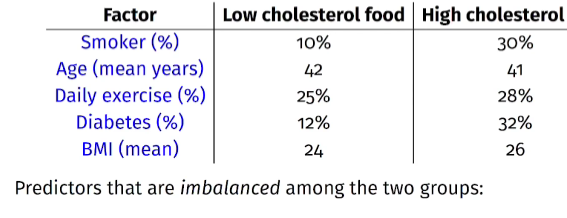

Now, given the above table, what variables would we say are contributing to confounding?
- The predictors that are `imbalanced` among the two groups contribute to confounding.
- As we can see that smoking and diabetes are the two predictors that are `heavily imbalanced` across the groups and these are potential confounders.

This is one way to identify or have a preliminary identification of what could be a potential confounders.

-----

Collinearity is a more serious version of confounding. It simply implies an exact linear relationship between the predictors.

So, what is the linear relationship between the predictors?
- Suppose we are trying to prtedict the height of the person using how old they are. we have on predictor 'age1' where the person's age is measured in years and for some reason sombody added another predictor called age2, which is the age of the person in months.

Now, the two predictors are prefectly linearly related. (age1 = 12 x age2)

If we build a model using these two features, the design matrix which will comprise the age1 feature values for all the samples as its first column and the age2 feature values for all the samples for its second column. The columns will be linearly dependent.

- As one of the important assumptions in the ordinarily square solution for a MLRM, what is going to happen is the inverse of X transpose, where X is the data matrix, does not exist.

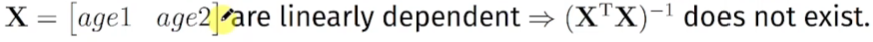

As the computation is ill-conditioned, softwares like R will identify this problem that we are supplying a data matrix where the predictors are linearly related to each other and give a result that is appropriate.

`Collinearilty, however, possees no problem for prediction.`

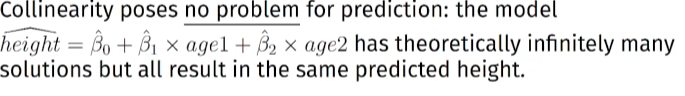

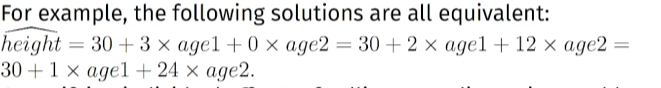

All these solutions are prefectly valid. The `only problem` is in interpreting the coefficient estimates.

`Quantifying individual effects of collinear predictors is a problem.`

The interpretation of the coefficient estimates relies on the fact that we can increase one predictor at a time by one unit while keeping all the predictors a constant.
- If the predictors are correlated, there is just no way we can fix all predictors and just increasse one predictor by one unit. (The correlation does not have to be a perfect linear correlaion, it can also be a weak linear correlation.)

In [2]:
# Load California housing data
file = '/content/SaratogaHouses.csv'
hData = read.csv(file, header = TRUE, stringsAsFactors = TRUE)
str(hData)

'data.frame':	1728 obs. of  16 variables:
 $ price          : int  132500 181115 109000 155000 86060 120000 153000 170000 90000 122900 ...
 $ lotSize        : num  0.09 0.92 0.19 0.41 0.11 0.68 0.4 1.21 0.83 1.94 ...
 $ age            : int  42 0 133 13 0 31 33 23 36 4 ...
 $ landValue      : int  50000 22300 7300 18700 15000 14000 23300 14600 22200 21200 ...
 $ livingArea     : int  906 1953 1944 1944 840 1152 2752 1662 1632 1416 ...
 $ pctCollege     : int  35 51 51 51 51 22 51 35 51 44 ...
 $ bedrooms       : int  2 3 4 3 2 4 4 4 3 3 ...
 $ fireplaces     : int  1 0 1 1 0 1 1 1 0 0 ...
 $ bathrooms      : num  1 2.5 1 1.5 1 1 1.5 1.5 1.5 1.5 ...
 $ rooms          : int  5 6 8 5 3 8 8 9 8 6 ...
 $ heating        : Factor w/ 3 levels "electric","hot air",..: 1 3 3 2 2 2 3 2 1 2 ...
 $ fuel           : Factor w/ 3 levels "electric","gas",..: 1 2 2 2 2 2 3 3 1 2 ...
 $ sewer          : Factor w/ 3 levels "none","public/commercial",..: 3 3 2 3 2 3 3 3 3 1 ...
 $ waterfront     : Factor w

In [3]:
# Building a linear regression model for price as a function of continuous predictor livingArea (in square feet)
model = lm(data = hData, price ~ livingArea)
summary(model)


Call:
lm(formula = price ~ livingArea, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-277022  -39371   -7726   28350  553325 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13439.394   4992.353   2.692  0.00717 ** 
livingArea    113.123      2.682  42.173  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 69100 on 1726 degrees of freedom
Multiple R-squared:  0.5075,	Adjusted R-squared:  0.5072 
F-statistic:  1779 on 1 and 1726 DF,  p-value: < 2.2e-16


Suppose, somebody introduced an additional feature into the dataframe called livingAreaNew which is a multiplicative factor times the original livingArea in the square feet insatead of square meters.

In [4]:
hData$livingAreaNew = 0.092903*hData$livingArea
str(hData)

'data.frame':	1728 obs. of  17 variables:
 $ price          : int  132500 181115 109000 155000 86060 120000 153000 170000 90000 122900 ...
 $ lotSize        : num  0.09 0.92 0.19 0.41 0.11 0.68 0.4 1.21 0.83 1.94 ...
 $ age            : int  42 0 133 13 0 31 33 23 36 4 ...
 $ landValue      : int  50000 22300 7300 18700 15000 14000 23300 14600 22200 21200 ...
 $ livingArea     : int  906 1953 1944 1944 840 1152 2752 1662 1632 1416 ...
 $ pctCollege     : int  35 51 51 51 51 22 51 35 51 44 ...
 $ bedrooms       : int  2 3 4 3 2 4 4 4 3 3 ...
 $ fireplaces     : int  1 0 1 1 0 1 1 1 0 0 ...
 $ bathrooms      : num  1 2.5 1 1.5 1 1 1.5 1.5 1.5 1.5 ...
 $ rooms          : int  5 6 8 5 3 8 8 9 8 6 ...
 $ heating        : Factor w/ 3 levels "electric","hot air",..: 1 3 3 2 2 2 3 2 1 2 ...
 $ fuel           : Factor w/ 3 levels "electric","gas",..: 1 2 2 2 2 2 3 3 1 2 ...
 $ sewer          : Factor w/ 3 levels "none","public/commercial",..: 3 3 2 3 2 3 3 3 3 1 ...
 $ waterfront     : Factor w

In [5]:
# Building a linear regression model for price as a function of continuous predictors livingArea (in square feet) and livingAreaNew (in square metre)
model = lm(data = hData, price ~ livingArea + livingAreaNew)
summary(model)


Call:
lm(formula = price ~ livingArea + livingAreaNew, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-277022  -39371   -7726   28350  553325 

Coefficients: (1 not defined because of singularities)
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   13439.394   4992.353   2.692  0.00717 ** 
livingArea      113.123      2.682  42.173  < 2e-16 ***
livingAreaNew        NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 69100 on 1726 degrees of freedom
Multiple R-squared:  0.5075,	Adjusted R-squared:  0.5072 
F-statistic:  1779 on 1 and 1726 DF,  p-value: < 2.2e-16


This is a very artificial problem where we are aware what the new variable is but this is how collinearity happens in real life.

Variables creep into the model in such a way that they have correlations between them. In this case there is a perfect correlation.

In the above summary, R have identified that the model corresponds to the columns which are linearly dependent, i.e.,
- livingArea and livingAreaNew are linearly dependent predictors.
- therefore, it simply sets the coefficient estimates for one of the correlated features to NA.

----

As we can see that the predictions are exactly the same, we might think that the software seems to figure out what the correlated features are. Here, we used an example of perfect linear correlation but we don't need a perfect correlation or a perfect linear relationship for its effect to manifest.

- Even a slightly strong linear relationship between predictors which may not be identified by the software can lead to misleading the interpretations about the coefficient estimates.
- So, in order to detect collinearity, we are going to calculate the `correlation matrix`.

### **Correlation Matrix:**
The idea behind the correlation matrix is to see how pairs of features or set of two features are correlated with respect to each other.

- Given a dataset, sample correlation measure between two predictors x1 and x2:

`x1 and x2 -> mean-centering them x1hat and x2hat -> between 1 and -1

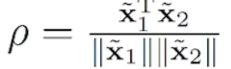

where, p (rho) = Pearson's correlation coefficient
- taking the product of the mean-centered heart-rate and blood-pressure vectors
- divide it by the product of their norms
- this will turn out to be a number between -1 and 1 acccording to a very popular theorem in linear algebra called the Cauchy-Schwarz inequality.

------

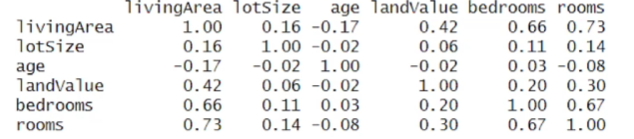

`Note: The Pearson's correlation coefficient can be calculated only between pairs of continuous features.`

If we have a continuous feature and one categorical feature, we cannot use this as a measure.

In [10]:
# Calculating correlation matrix for continuous predictors livingArea, lotSize, age, landValue, bedrooms, rooms
# Using cor()
round(cor(hData[c('livingArea', 'lotSize', 'age', 'landValue', 'bedrooms', 'rooms')]), 2)

,livingArea,lotSize,age,landValue,bedrooms,rooms
livingArea,1.00,0.16,-0.17,0.42,0.66,0.73
lotSize,0.16,1.00,-0.02,0.06,0.11,0.14
age,-0.17,-0.02,1.00,-0.02,0.03,-0.08
landValue,0.42,0.06,-0.02,1.00,0.20,0.30
bedrooms,0.66,0.11,0.03,0.20,1.00,0.67
rooms,0.73,0.14,-0.08,0.30,0.67,1.00


It is important to keep in mind that the correlation measure that we are looking at us only a quantification of the extent of linear relationship.
- The two features could be nonlinearly related and have a correlation that is not indicative.
- Also, correlation close to 0 does not necessarily mean that there is no relationship. What it means is that there is no discernible linear relationship.

For example, there may or may not be a non-linear relationship which we do not know if it is close to 0.

Thus, correlation matrix helps us identify features that are linearly correlated.

-----

### What are the consequences of having correlated predictors?

Although the software can identify these perfectly related predictors, there can be:
1. `The regression coefficients estimates will change dramatically` on which correlated predictors are used or included or not in building the model.

In [11]:
# Building a linear regression model for price as a function of continuous predictors livingArea, lotSize, age, landValue, bedrooms, rooms
model_full = lm(data = hData, price ~ livingArea + lotSize + age + landValue + bedrooms + rooms)
summary(model_full)


Call:
lm(formula = price ~ livingArea + lotSize + age + landValue + 
    bedrooms + rooms, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-248223  -36077   -5633   26864  464151 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.924e+04  6.120e+03   6.411 1.86e-10 ***
livingArea   8.729e+01  4.041e+00  21.602  < 2e-16 ***
lotSize      6.602e+03  2.137e+03   3.090 0.002034 ** 
age         -2.612e+02  5.231e+01  -4.993 6.55e-07 ***
landValue    9.561e-01  4.685e-02  20.407  < 2e-16 ***
bedrooms    -9.103e+03  2.633e+03  -3.458 0.000558 ***
rooms        2.726e+03  1.008e+03   2.705 0.006890 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 61170 on 1721 degrees of freedom
Multiple R-squared:  0.6152,	Adjusted R-squared:  0.6139 
F-statistic: 458.6 on 6 and 1721 DF,  p-value: < 2.2e-16


From the correlation matrix, we know that the living Area and the no. of rooms are fairly positively correlated with score 0.73.
- So if we were to remove, for example, rooms as one of the predictors in building the model, it could potentially change the coefficient estimate for living area by large amount.

We have 'livingArea   8.729e+01' using the full-model where we used all the continuous predictors in total.

-----

Now, Lets remove the rooms as it is positively correlated with living area. (We are regressing on the rest of the predictors except the rooms.)

In [12]:
# Building a linear regression model for price as a function of continuous predictors livingArea, lotSize, age, landValue, bedrooms (rooms, highly correlated with livingArea, is not included)
model = lm(data = hData, price ~ livingArea + lotSize + age + landValue + bedrooms)
summary(model)


Call:
lm(formula = price ~ livingArea + lotSize + age + landValue + 
    bedrooms, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-242456  -35764   -5878   26890  469160 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.108e+04  6.093e+03   6.742 2.12e-11 ***
livingArea   9.241e+01  3.578e+00  25.824  < 2e-16 ***
lotSize      6.747e+03  2.140e+03   3.153  0.00164 ** 
age         -2.619e+02  5.240e+01  -4.998 6.40e-07 ***
landValue    9.592e-01  4.692e-02  20.442  < 2e-16 ***
bedrooms    -6.497e+03  2.454e+03  -2.647  0.00820 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 61280 on 1722 degrees of freedom
Multiple R-squared:  0.6136,	Adjusted R-squared:  0.6124 
F-statistic: 546.8 on 5 and 1722 DF,  p-value: < 2.2e-16


As we can see, the coefficient estimate for living area now is '9.241e+01' which increased from '8.729e+01' because we did not include rooms.

### Now, which coefficient estimate is more helpful for interpretation? One with the rooms included or one wher we excluded the rooms.

This sort of interpretation challenge can actually easily be addressed.

----

2. When we build the model with correlated predictors, `coefficient estimates for predictors with known strong relationships with the resposne will not be accurate.`

---

3. `The standard errors of the coefficient estimates will be relatively large` when we build a model that includes correlated predictors.

For example when we vuilt a full mdoel the standard error for `bedroom`was 2.633. When we excluded the room, we saw the standard error to be 2.454.

In other words, standard error tend to be bigger for amodel that included rooms/ have correlated predictors.

(Due to having big standard errors, the confidence interval for the coefficients will also be bigger and therefore the interpretation will also cover a much bigger range of values. So we won't have much confidence in the coefficient estmates anymore.)

- Wider the confidence interval, the less confidence we have unterpreting the numbers that comes out of it.

These are some of the challenges that we might face by building a model that involves correlated predictors.

### What we can do to understand what variable are confounders / what variables are correlated?

One way to attack this problem is by building a regression model using each one of the predictors individually

Let's try building a model with only LivingArea and compare the coefficient estimates.

In [13]:
# Build a regression model using each one of the following predictors individually: livingArea, lotSize, age, landValue, bedrooms, rooms
model = lm(data = hData, price ~ livingArea)
summary(model)


Call:
lm(formula = price ~ livingArea, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-277022  -39371   -7726   28350  553325 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13439.394   4992.353   2.692  0.00717 ** 
livingArea    113.123      2.682  42.173  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 69100 on 1726 degrees of freedom
Multiple R-squared:  0.5075,	Adjusted R-squared:  0.5072 
F-statistic:  1779 on 1 and 1726 DF,  p-value: < 2.2e-16


As we can see when we use only livingArea as the predoctor, we see that our coefficient estimate is `livingArea    113.123`, whereas in full-model it was `livingArea   8.729e+01`.

`This is a lot less which is an immediate indication that the livingArea is a confounder.`

- Because its values are changing dramatically when we added other features or other predictors in the model.

-----

### Similarly let's build a model for only `Age`

In [15]:
model = lm(data = hData, price ~ age)
summary(model)


Call:
lm(formula = price ~ age, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-222183  -66299  -22232   43147  564995 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 229728.46    3218.18  71.385  < 2e-16 ***
age           -636.26      79.66  -7.987  2.5e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 96700 on 1726 degrees of freedom
Multiple R-squared:  0.03564,	Adjusted R-squared:  0.03508 
F-statistic: 63.79 on 1 and 1726 DF,  p-value: 2.502e-15


The coefficeint estimate is `-636.26` whereas it was `-2.612e+02` in the full-model indiacting

- We see here that while this might appear to be a big difference, `it is also important to keep in mind the values of standard errors`.

-------

But this process of creating many univariate or simple linear regression models ahas a problem.

### How many simple linear regression models are we going to build?

There is a better way to identify the collinearity between features and feeatuers that are confounders. We do this by calculating what is known as the `variance inflation factor`. This is an important idea that helps us quantify collinearity.

**How does it work?**

Suppose we have all predictors that are perfectly collinear. For example: heartRate and there are only 2 features 0.6 times bloodPressure plus 0.8 times temperature.

`HR = o.6BP + 0.8temp`

Here, R-squared value for this model will be close to 1 if there is a perfect linear relationship.
- The tolerance of the predictor (HR) which is regressed upon the others(Bp) is `1 - Rsquared`

What is tolerance?
- If the heartRate has a perfect linea relationship, thean we see that the tolerance is equal to 0.
- A small value of tolerance ( <0.1, for example) indicates that the predictor under consideration (HR) is highly correlated with the other predictors (BP, Temperature).

But we do not use tolerance. we use a quantity called `variance inflation factor (VIF)` which is `1/tolerance = 1/(1-Rsquared)`.

Therefore, we use how big the VIF is to come ot conclusion about how correlated the feature (HR) is with the respect to others (BP, temp).

What is the `threshold` typically we look at VIF?
- A large value of VIF (> 10, for example) indiactes additional study about the correlation between predictors.

(10 is actually arbitrary as some use 5 and some use 20 as it requires some expertise about the data.)

## So, let's calculate the VIF.

In [16]:
# Building a model by regressing livingArea on the other predictors lotSize, age, landValue, bedrooms, and rooms
model = lm(data = hData, livingArea ~ lotSize + age + landValue + bedrooms + rooms)
summary(model)


Call:
lm(formula = livingArea ~ lotSize + age + landValue + bedrooms + 
    rooms, data = hData)

Residuals:
     Min       1Q   Median       3Q      Max 
-1404.20  -226.24    -9.98   226.82  2317.19 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.015e+02  3.641e+01   2.786 0.005389 ** 
lotSize      4.607e+01  1.269e+01   3.630 0.000292 ***
age         -2.998e+00  3.034e-01  -9.879  < 2e-16 ***
landValue    3.948e-03  2.627e-04  15.028  < 2e-16 ***
bedrooms     2.398e+02  1.460e+01  16.425  < 2e-16 ***
rooms        1.166e+02  5.312e+00  21.958  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 364.8 on 1722 degrees of freedom
Multiple R-squared:  0.6547,	Adjusted R-squared:  0.6537 
F-statistic: 653.1 on 5 and 1722 DF,  p-value: < 2.2e-16


As we can see the adjusted R-squared value for this model is `0.6537`.

So, the totlerance is `1 - 0.6537` i.e.,

In [17]:
tolerance = 1 - 0.6537
tolerance

[1] 0.3463

In [18]:
# VIF
vif = 1/tolerance
vif

[1] 2.88767

We see that the our VIF is around 3 which is a little high but not too high.

Therefore, 10 is typically the cut-off. So if it goes about 10 then we know that it is correlated to the rest of the features. So, we will drop it.

### Now, we are able to quantify the extent of linear correlation or the linear relationship of one feature predictor with respect to the other predictors.

## Installing the caret package

In [19]:
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




In [20]:
# Calculate VIF of the predictors using the caret package
car::vif(model_full)

livingArea    lotSize        age  landValue   bedrooms      rooms 
  2.896419   1.028433   1.077382   1.242562   2.136945   2.515328

So, once we have the VIF values, we just look at those features that have large VIF values i.e., typically VIF > 10 and filter them out and build a model with rest of the features.

In [21]:
summary(model_full)


Call:
lm(formula = price ~ livingArea + lotSize + age + landValue + 
    bedrooms + rooms, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-248223  -36077   -5633   26864  464151 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.924e+04  6.120e+03   6.411 1.86e-10 ***
livingArea   8.729e+01  4.041e+00  21.602  < 2e-16 ***
lotSize      6.602e+03  2.137e+03   3.090 0.002034 ** 
age         -2.612e+02  5.231e+01  -4.993 6.55e-07 ***
landValue    9.561e-01  4.685e-02  20.407  < 2e-16 ***
bedrooms    -9.103e+03  2.633e+03  -3.458 0.000558 ***
rooms        2.726e+03  1.008e+03   2.705 0.006890 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 61170 on 1721 degrees of freedom
Multiple R-squared:  0.6152,	Adjusted R-squared:  0.6139 
F-statistic: 458.6 on 6 and 1721 DF,  p-value: < 2.2e-16


Here, in our full_model 61.39% of the variance in the house price is explained using the linear model.

In [22]:
# Building a linear regression model for price as a function of continuous predictors livingArea, lotSize, age, landValue, bedrooms (rooms, highly correlated with livingArea, is not included)
model = lm(data = hData, price ~ livingArea + lotSize + age + landValue + bedrooms)
summary(model)


Call:
lm(formula = price ~ livingArea + lotSize + age + landValue + 
    bedrooms, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-242456  -35764   -5878   26890  469160 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.108e+04  6.093e+03   6.742 2.12e-11 ***
livingArea   9.241e+01  3.578e+00  25.824  < 2e-16 ***
lotSize      6.747e+03  2.140e+03   3.153  0.00164 ** 
age         -2.619e+02  5.240e+01  -4.998 6.40e-07 ***
landValue    9.592e-01  4.692e-02  20.442  < 2e-16 ***
bedrooms    -6.497e+03  2.454e+03  -2.647  0.00820 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 61280 on 1722 degrees of freedom
Multiple R-squared:  0.6136,	Adjusted R-squared:  0.6124 
F-statistic: 546.8 on 5 and 1722 DF,  p-value: < 2.2e-16


When we excluded rooms, the adjusted R-squared value is almost the same. We did not lose much in explaining the variance in the resposne variable.

- This is a typical indication that the predictor that we excluded happend to be linearly associated with some of the other predictors.